# Fractal Analysis

In [146]:
#calling the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc

## Importing the data

In [45]:
df= pd.read_csv("intern_dataset.csv")

In [46]:
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [47]:
df.shape

(912000, 4)

In [48]:
df.describe()

,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


In [49]:
df.isnull().sum()

Time       0
Signal1    0
Signal2    0
Label      0
dtype: int64

In [50]:
corelation=df.corr()

<AxesSubplot:>

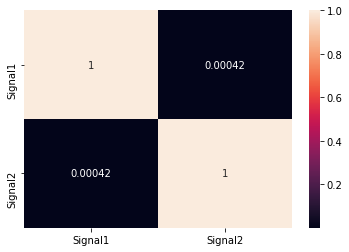

In [51]:
sns.heatmap(corelation, xticklabels=corelation.columns,yticklabels=corelation.columns,
           annot=True)

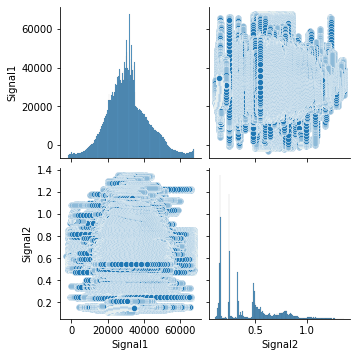

In [52]:
sns.pairplot(df)

## Seperating the labels

In [88]:
#seperating the data
A=df.where(df.Label=="A").dropna()
B=df.where(df.Label=="B").dropna()
C=df.where(df.Label=="C").dropna()

## Conversion into array

In [141]:
#converting into array
xa = A.iloc[:, [1,2]].values
xb= B.iloc[:, [1,2]].values
xc= C.iloc[:, [1,2]].values

## Hurst exponent of Label A

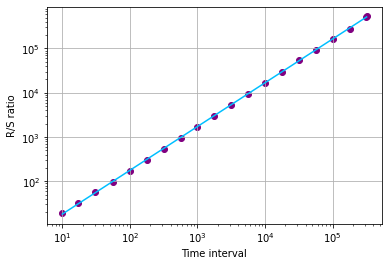

H=0.9896, c=1.8535


In [152]:
#Hurst exponent of Label A
H, c, data = compute_Hc(xa, kind='change', simplified=True)
#change for absolute values
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

## Hurst exponent of Label B

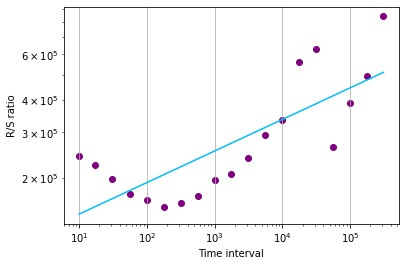

H=0.1220, c=109284.9951


In [153]:
#Hurst exponent of Label B
H, c, data = compute_Hc(xb, kind='change', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

## Hurst exponent of Label C

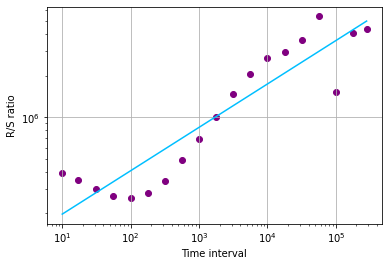

H=0.3152, c=95441.1205


In [154]:
#Hurst exponent of Label C
H, c, data = compute_Hc(xc, kind='change', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

## DFA of label A

In [168]:
import nolds
dfa=nolds.dfa(xa)
dfa

0.6193017677728346

## DFA of label B

In [169]:
dfa_b=nolds.dfa(xb)
dfa_b

1.8176714270845182

## DFA of label C

In [170]:
dfa_c=nolds.dfa(xc)
dfa_c

1.7160380861830988

## The Conclusion


So these graphs and values suggest that B is the most complex and then C and then A